In [56]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [59]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


In [58]:
df=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\Cleaning the data\clean_data.csv')
df.head()
dataX=df.iloc[:,:-1]
dataY=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
from collections import Counter
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


In [14]:
clf =tree.DecisionTreeClassifier()
nosamp_clf=clf.fit(x_train,y_train)
nosamp_prediction=nosamp_clf.predict(x_test)

In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [39]:
#nosampling
print(f"Training statistics: {Counter(y_train)}")
print(f"Testing statistics: {Counter(y_test)}")
amex_nosamp_accuracy=accuracy_score(nosamp_prediction,y_test)
amex_nosamp_precision=precision_score(nosamp_prediction,y_test)
amex_nosamp_recall=recall_score(nosamp_prediction,y_test)
amex_nosamp_f1=f1_score(nosamp_prediction,y_test)
print(amex_nosamp_accuracy,amex_nosamp_precision,amex_nosamp_recall,amex_nosamp_f1)

Training statistics: Counter({0: 31403, 1: 2743})
Testing statistics: Counter({0: 4161, 1: 392})
0.9747419283988579 0.8571428571428571 0.850632911392405 0.8538754764930113


In [40]:
#oversampling
#here we have oversampled so in the training set there are 31403 in each catagory
over_sampler = RandomOverSampler(random_state=42)
x_ov, y_ov = over_sampler.fit_resample(x_train, y_train)

print(f"Training target statistics: {Counter(y_ov)}")
print(f"Testing target statistics: {Counter(y_test)}")
#now we make the decision tree with our new smaples
oversamp_clf=clf.fit(x_ov,y_ov)
oversamp_prediction=clf.predict(x_test)
amex_oversamp_accuracy=accuracy_score(oversamp_prediction,y_test)
amex_oversamp_precision=precision_score(oversamp_prediction,y_test)
amex_oversamp_recall=recall_score(oversamp_prediction,y_test)
amex_oversamp_f1=f1_score(oversamp_prediction,y_test)
print(amex_oversamp_accuracy,amex_oversamp_precision,amex_oversamp_recall,amex_oversamp_f1)

Training target statistics: Counter({0: 31403, 1: 31403})
Testing target statistics: Counter({0: 4161, 1: 392})
0.9729848451570393 0.8367346938775511 0.8475452196382429 0.8421052631578948


In [41]:
#undersampling
under_sampler = RandomUnderSampler(random_state=42)
x_under, y_under = under_sampler.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_under)}")
print(f"Testing target statistics: {Counter(y_test)}")
#x_res=x_res[:,1:]
#here we have undersampled so in the training set there are 2743 in each catagory
#now we make the decision tree with our new smaples
undersamp_clf=clf.fit(x_under,y_under)
undersamp_prediction=clf.predict(x_test)
amex_undersamp_accuracy=accuracy_score(undersamp_prediction,y_test)
amex_undersamp_precision=precision_score(undersamp_prediction,y_test)
amex_undersamp_recall=recall_score(undersamp_prediction,y_test)
amex_undersamp_f1=f1_score(undersamp_prediction,y_test)
print(amex_undersamp_accuracy,amex_undersamp_precision,amex_undersamp_recall,amex_undersamp_f1)

Training target statistics: Counter({0: 2743, 1: 2743})
Testing target statistics: Counter({0: 4161, 1: 392})
0.9562925543597628 0.9489795918367347 0.6751361161524501 0.7889713679745494


In [67]:
oversample_smote = SMOTE()
x_smote, y_smote = oversample_smote.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_smote)}")
print(f"Testing target statistics: {Counter(y_test)}")
oversamp_smote_clf=clf.fit(x_smote,y_smote)
oversamp_smote_prediction=clf.predict(x_test)
amex_oversamp_smote_accuracy=accuracy_score(oversamp_smote_prediction,y_test)
amex_oversamp_smote_precision=precision_score(oversamp_smote_prediction,y_test)
amex_oversamp_smote_recall=recall_score(oversamp_smote_prediction,y_test)
amex_oversamp_smote_f1=f1_score(oversamp_smote_prediction,y_test)
print(amex_oversamp_smote_accuracy,amex_oversamp_smote_precision,amex_oversamp_smote_recall,amex_oversamp_smote_f1)

Training target statistics: Counter({1: 31360, 0: 31360})
Testing target statistics: Counter({0: 4201, 1: 352})
0.9743026575884033 0.8778409090909091 0.8067885117493473 0.8408163265306123


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

In [49]:
rfc =ensemble.RandomForestClassifier()
rfc_nosamp=rfc.fit(x_train,y_train)
rfc_nosamp_prediction=rfc_nosamp.predict(x_test)

In [69]:
#rfc nosampling
amex_rfc_nosamp_accuracy=accuracy_score(rfc_nosamp_prediction,y_test)
amex_rfc_nosamp_precision=precision_score(rfc_nosamp_prediction,y_test)
amex_rfc_nosamp_recall=recall_score(rfc_nosamp_prediction,y_test)
amex_rfc_nosamp_f1=f1_score(rfc_nosamp_prediction,y_test)
rfc_nosamp_scores= [amex_rfc_nosamp_accuracy,amex_rfc_nosamp_precision,amex_rfc_nosamp_recall,amex_rfc_nosamp_f1]
print(rfc_nosamp_scores)

[0.8647045903799693, 0.05965909090909091, 0.06862745098039216, 0.06382978723404256]


In [65]:
#rfc oversampling
#now we make the decision tree with our new smaples
rfc_oversamp=rfc.fit(x_ov,y_ov)
rfc_oversamp_prediction=rfc.predict(x_test)
amex_rfc_oversamp_accuracy=accuracy_score(rfc_oversamp_prediction,y_test)
amex_rfc_oversamp_precision=precision_score(rfc_oversamp_prediction,y_test)
amex_rfc_oversamp_recall=recall_score(rfc_oversamp_prediction,y_test)
amex_rfc_oversamp_f1=f1_score(rfc_oversamp_prediction,y_test)
print(amex_rfc_oversamp_accuracy,amex_rfc_oversamp_precision,amex_rfc_oversamp_recall,amex_rfc_oversamp_f1)


0.9967054689215902 0.9715909090909091 0.9855907780979827 0.9785407725321887


In [54]:
#rfc oversampling
#now we make the decision tree with our new smaples
undersamp_rfc=rfc.fit(x_under,y_under)
rfc_undersamp_prediction=rfc.predict(x_test)
amex_rfc_undersamp_accuracy=accuracy_score(rfc_undersamp_prediction,y_test)
amex_rfc_undersamp_precision=precision_score(rfc_undersamp_prediction,y_test)
amex_rfc_undersamp_recall=recall_score(rfc_undersamp_prediction,y_test)
amex_rfc_undersamp_f1=f1_score(rfc_undersamp_prediction,y_test)
print(amex_rfc_undersamp_accuracy,amex_rfc_undersamp_precision,amex_rfc_undersamp_recall,amex_rfc_undersamp_f1)


0.9527783878761257 0.9948979591836735 0.6467661691542289 0.7839195979899498


In [63]:
oversample_smote = SMOTE()
x_smote, y_smote = oversample_smote.fit_resample(x_train, y_train)
print(f"Training target statistics: {Counter(y_smote)}")
print(f"Testing target statistics: {Counter(y_test)}")

rfc_oversamp_smote=rfc.fit(x_smote,y_smote)
rfc_oversamp_smote_prediction=rfc.predict(x_test)
amex_rfc_oversamp_smote_accuracy=accuracy_score(rfc_oversamp_smote_prediction,y_test)
amex_rfc_oversamp_smote_precision=precision_score(rfc_oversamp_smote_prediction,y_test)
amex_rfc_oversamp_smote_recall=recall_score(rfc_oversamp_smote_prediction,y_test)
amex_rfc_oversamp_smote_f1=f1_score(rfc_oversamp_smote_prediction,y_test)
print(amex_rfc_oversamp_smote_accuracy,amex_rfc_oversamp_smote_precision,amex_rfc_oversamp_smote_recall,amex_rfc_oversamp_smote_f1)

Training target statistics: Counter({1: 31360, 0: 31360})
Testing target statistics: Counter({0: 4201, 1: 352})
0.980232813529541 0.8494318181818182 0.8898809523809523 0.869186046511628


In [ ]:
#gradient boosted decsion trees

<BarContainer object of 4 artists>

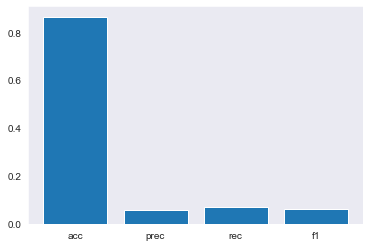

In [71]:
names=['acc','prec','rec','f1']
plt.bar(names,rfc_nosamp_scores)